In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

## Load and Perpare Data

In [100]:
df = pd.read_excel("Monthly_CO2_Concentrations.xlsx")
display(df.shape)
df.isna().sum()

(174, 3)

CO2      13
Year     13
Month    13
dtype: int64

In [101]:
df = df.dropna()
df.Year = df.Year.astype(np.int32)
df.Month = df.Month.astype(np.int32)
df.sort_values(['Year', 'Month'], inplace=True)
print(df.head())

      CO2  Year  Month
0  333.13  1974      5
1  332.09  1974      6
2  331.10  1974      7
3  329.14  1974      8
4  327.36  1974      9


In [102]:
df["Date"] = df.apply(lambda row: "%4d-%02d" %  (row.Year, row.Month), axis=1)
df = df.set_index("Date")
print(df.head())

            CO2  Year  Month
Date                        
1974-05  333.13  1974      5
1974-06  332.09  1974      6
1974-07  331.10  1974      7
1974-08  329.14  1974      8
1974-09  327.36  1974      9


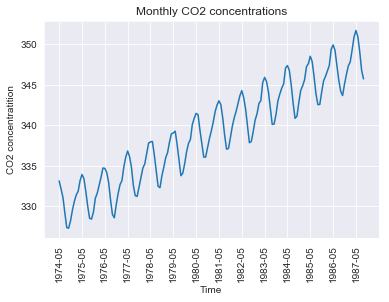

In [103]:
plt.plot(df.CO2)
plt.title('Monthly CO2 concentrations')
plt.ylabel('CO2 concentratition')
plt.xlabel('Time')
plt.xticks(rotation=90)
xticks = df.index.tolist()[0::12]
plt.xticks(xticks, xticks)
plt.savefig("../pic/CO2_original.pdf", bbox_inches="tight")
plt.show() 

## Identify and Remove Trend 

In [104]:
df = df.reset_index() 
print(df.head(5))

      Date     CO2  Year  Month
0  1974-05  333.13  1974      5
1  1974-06  332.09  1974      6
2  1974-07  331.10  1974      7
3  1974-08  329.14  1974      8
4  1974-09  327.36  1974      9


In [105]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(df.index).reshape(-1, 1), df['CO2'])
print('Trend model coefficient=%.3f and intercept=%.3f.'  % (trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.121 and intercept=329.453.


In [107]:
residuals = np.array(df['CO2']) - trend_model.predict(np.array(df.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))

plt.plot(df.Date, residuals, 'o')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.xticks(rotation=90)
xticks = df.Date.tolist()[0::12]
plt.xticks(xticks, xticks)
plt.savefig("../pic/CO2_trend_residuals_dots.pdf", bbox_inches="tight")
plt.show()

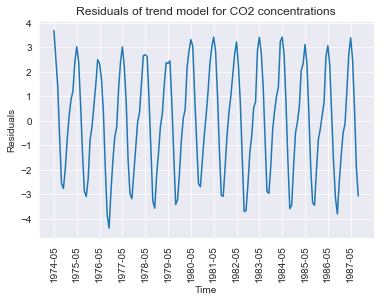

In [109]:
plt.plot(df.Date, residuals, '-')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.xticks(rotation=90)
xticks = df.Date.tolist()[0::12]
plt.xticks(xticks, xticks)
plt.savefig("../pic/CO2_trend_residuals_lines.pdf", bbox_inches="tight")
plt.show()